<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Lista2_Exerc%C3%ADcio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Aula prática: rede neural para regressão não linear com keras*

Model: "rede_regressao"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 14)                28        
_________________________________________________________________
dense_10 (Dense)             (None, 12)                180       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 13        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


Text(0, 0.5, 'y')

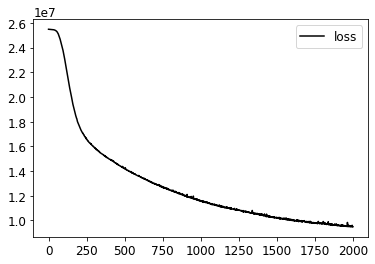

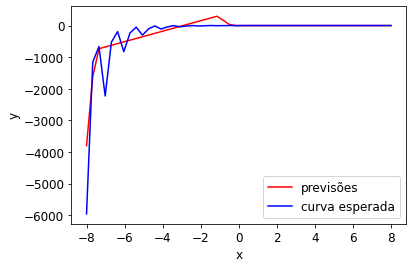

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def fobj(X): 
  OF=(1-np.exp(-X)*(np.cos(2*np.pi*X)+1)) #Cria uma subrotina para definir para definir a função que faremos a regressão
  return OF

#criando o data set de treino e teste
s_d=200                                   #quantos Dtrain
s_t=50                                    #quantos Dtest

x_train = np.linspace(-10.0,10.0,s_d)     #Define a entrada de treinamento da rede
y_train = fobj(x_train)                 #Define as saídas de treinamento da rede, usando a subrotina
x_test=np.linspace(-8, 8, s_t)            #Define a entrada de teste da rede
y_test=fobj(x_test)                     #Define a saída de teste da rede. SÓ PARA COMPARAR
#criando a rede neural
model=tf.keras.Sequential(name='rede_regressao')
#configurando as camadas da rede
model.add(tf.keras.layers.Dense(14, input_dim=1, use_bias=1,activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))
#compilando a rede
opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt,loss='mean_squared_error')
print(model.summary())
#treinando a rede
history=model.fit(x_train, y_train, epochs=2000, verbose=0)
#mostra a performace do treinamento da rede
plt.rcParams.update({'font.size':12})
plt.figure()
plt.plot(history.history['loss'],'k')
plt.legend(['loss'])
#testando a rede
y_pred=model.predict(x_test)
#mostra o resultado do ajuste em relação ao esperado
plt.figure()
plt.plot(x_test, y_pred,'r')
plt.plot(x_test, y_test, 'b-')
plt.legend(['previsões', 'curva esperada'])
plt.xlabel('x');plt.ylabel('y')